In [1]:
import pandas_datareader as pdr
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def get_input_feature(ticker, start_date, end_date):
    
    return pdr.get_data_yahoo(ticker,start_date, end_date)

In [3]:
###################################
# make input features
###################################
# read IVV stock data
import datetime

now = datetime.datetime.now()
end_date = now.strftime("%Y-%m-%d")
print end_date
                        
ivv = get_input_feature('IVV','2016-01-01', end_date)
gld = get_input_feature('GLD','2016-01-01', end_date)


2017-12-13


In [16]:
# nomalize Adj close price
# nomalize Volume
#print ivv.head()
nm_ivv = ivv.copy(deep=True)
nm_ivv['Adj Close'] = nm_ivv['Adj Close']/nm_ivv['Adj Close'][0]
nm_ivv['Volume'] = nm_ivv['Volume']/nm_ivv['Volume'].mean()
nm_ivv['Open'] = (nm_ivv['Close']-nm_ivv['Open'])/nm_ivv['Open']
nm_ivv['High'] = (nm_ivv['High']-nm_ivv['Low'])/nm_ivv['Low']
nm_ivv = nm_ivv.rename(columns = {'Open':'Change'})
nm_ivv = nm_ivv.rename(columns = {'High':'Maxofday'})

#print nm_ivv.head()

#print gld.head()
nm_gld = gld.copy(deep=True)
nm_gld['Adj Close'] = nm_gld['Adj Close']/nm_gld['Adj Close'][0]
nm_gld['Volume'] = nm_gld['Volume']/nm_gld['Volume'].mean()
#print nm_gld.head()


prices = nm_ivv['Adj Close']
features = nm_ivv.drop(['Close', 'Low'], axis = 1)


# Rolling Mean 10 days
rm10_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=10)
rm10_ivv_ = pd.DataFrame(rm10_ivv)
rm10_ivv_ = rm10_ivv_.rename(columns = {'Adj Close':'RM10'})

# Rolling Mean 20 days
rm20_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=20)
rm20_ivv_ = pd.DataFrame(rm20_ivv)
rm20_ivv_ = rm20_ivv_.rename(columns = {'Adj Close':'RM20'})

# Rolling Mean 40 days
rm40_ivv = pd.rolling_mean(nm_ivv['Adj Close'], window=40)
rm40_ivv_ = pd.DataFrame(rm40_ivv)
rm40_ivv_ = rm40_ivv_.rename(columns = {'Adj Close':'RM40'})


#print gld.head()
gold = nm_gld.drop(['Open', 'High', 'Close', 'Low', 'Volume'], axis = 1)
gold = gold.rename(columns = {'Adj Close':'GLD'})
#print gold.head()
#print "gold.dtypes", gold.dtypes

features = features.join(gold, how='inner')
features = features.join(rm10_ivv_, how='inner')
features = features.join(rm20_ivv_, how='inner')
features = features.join(rm40_ivv_, how='inner')

print features.head()


              Change  Maxofday  Adj Close    Volume       GLD  RM10  RM20  \
Date                                                                        
2016-01-04  0.002631  0.012125   1.000000  2.016095  1.000000   NaN   NaN   
2016-01-05  0.000544  0.009152   1.002079  1.425954  1.002819   NaN   NaN   
2016-01-06  0.002057  0.012338   0.988960  1.489472  1.017300   NaN   NaN   
2016-01-07 -0.006673  0.019684   0.965297  2.044548  1.031684   NaN   NaN   
2016-01-08 -0.016876  0.022283   0.954604  2.412838  1.027116   NaN   NaN   

            RM40  
Date              
2016-01-04   NaN  
2016-01-05   NaN  
2016-01-06   NaN  
2016-01-07   NaN  
2016-01-08   NaN  


/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/chrisle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()


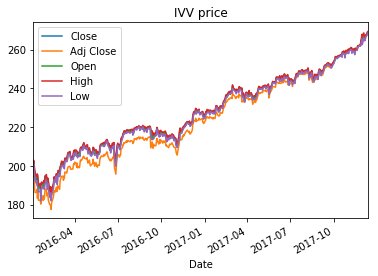

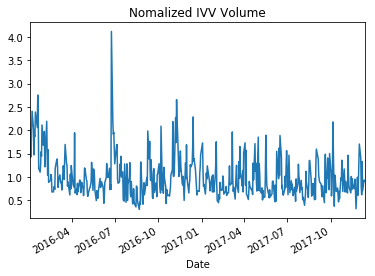

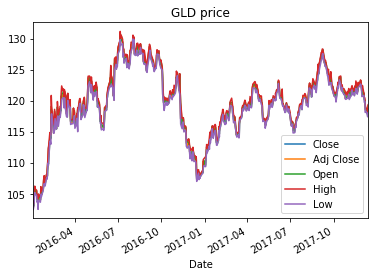

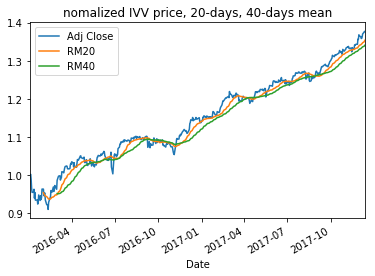

In [17]:
##################################
# check input features using graph
#################################
# plot IVV stock 
import pandas as pd 
import matplotlib.pyplot as plt

ivv[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='IVV price')
plt.show()

nm_ivv['Volume'].plot(title='Nomalized IVV Volume')
plt.show()

gld[['Close','Adj Close', 'Open', 'High', 'Low']].plot(title='GLD price')
plt.show()

features[['Adj Close', 'RM20', 'RM40']].plot(title='nomalized IVV price, 20-days, 40-days mean')
plt.show()

Training set has 377 samples.
Testing set has 45 samples.
[ 1.28785101  1.29216381  1.29593938  1.29162565  1.29538246  1.29677369
  1.29695051  1.29786482  1.29990215  1.30091316  1.30191019  1.30328402
  1.30593137  1.30676829  1.30833492  1.30850403  1.30935638  1.3116726
  1.31244936  1.31301711  1.3136087   1.31508511  1.316573    1.31759161
  1.32041757  1.32076246  1.31955447  1.31996412  1.32062829  1.32124875
  1.31885294  1.32276218  1.3214287   1.32239665  1.32525048  1.32572656
  1.32566045  1.32782497  1.33137425  1.33324314  1.33952955  1.34088171
  1.34124483  1.33966458  1.34029979]
degree : 1
Mean squared error: 0.00
Variance score: -0.79
[ 1.30638711  1.31368055  1.32251446  1.30949825  1.31671166  1.31830051
  1.31745295  1.31821528  1.3209555   1.32141692  1.32204775  1.32448665
  1.32774866  1.3292268   1.33112029  1.33166167  1.33188945  1.33453853
  1.33643709  1.33606401  1.33608021  1.33872142  1.34027803  1.34157021
  1.34782738  1.34680572  1.34353713  1.3434

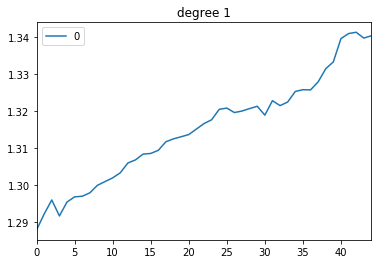

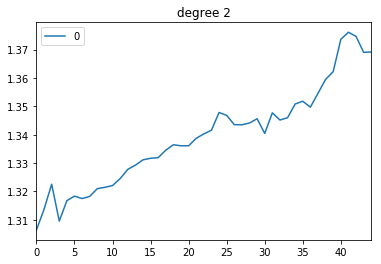

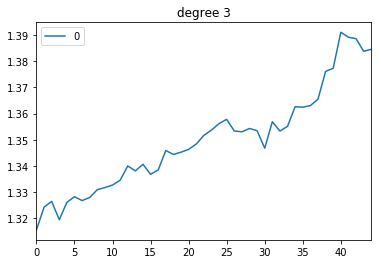

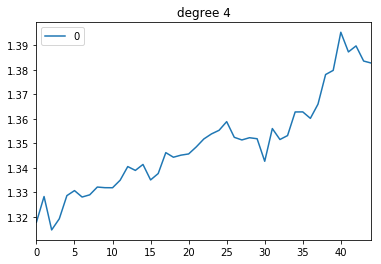

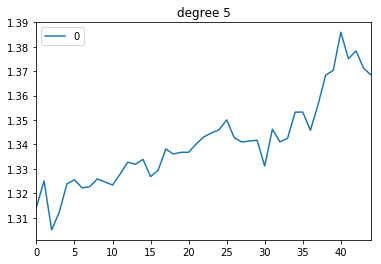

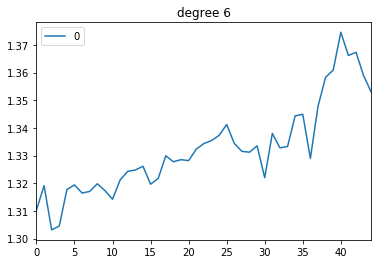

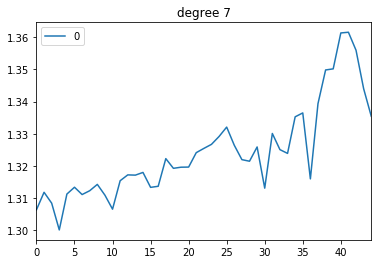

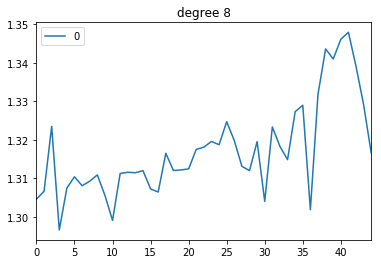

In [18]:
# do polynomial regression for benchmark

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from pandas import Series, DataFrame, Panel

X_train = features[65:-50]
y_train = prices[70:-45]
X_test = features[-50:-5]
y_test = prices[-45:]

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

colors = ['teal', 'yellowgreen', 'gold']
lw = 2

for count, degree in enumerate([1, 2, 3, 4, 5, 6, 7, 8]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print y_pred
    LR_result = pd.DataFrame(y_pred)
    LR_result.plot(title="degree %d" % degree)
    # The mean squared error
    print("degree : %d" % degree)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
plt.show()

[ 1.37664595  1.37792243  1.38308837  1.38519017  1.38624164]
            Prediction
Date                  
2017-12-14  268.519586
2017-12-15  268.768567
2017-12-16  269.776202
2017-12-17  270.186166
2017-12-18  270.391260


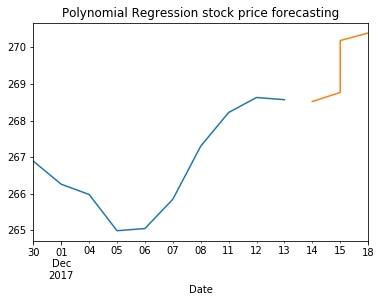

In [19]:
# Predict future 1-week
X_train = features[65:-5]
y_train = prices[70:]
X_future = features[-5:]

from sklearn.metrics import mean_squared_error, r2_score

model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
model.fit(X_train, y_train)

# Make predictions using the testing set
y_future = model.predict(X_future)

print y_future

start_predict_day = now+datetime.timedelta(1)
end_predict_day = now+datetime.timedelta(5)
start_predict_day = start_predict_day.strftime("%Y-%m-%d")
end_predict_day = end_predict_day.strftime("%Y-%m-%d")

days = pd.date_range(start_predict_day, end_predict_day, freq='D')

df = pd.DataFrame({'Date': days, 'Prediction': y_future})
df = df.set_index('Date')
df['Prediction'] = df['Prediction'] * ivv['Adj Close'][0]
print df 

real_prices = prices[-10:] * ivv['Adj Close'][0]
ax = real_prices.plot()
df['Prediction'].plot(title='Polynomial Regression stock price forecasting', ax = ax)
plt.show()